# Titanic Survival Prediction

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## To Ignore Warning

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Import File

In [4]:
cd C:\Users\Dell\OneDrive\Desktop\Datasets

C:\Users\Dell\OneDrive\Desktop\Datasets


In [5]:
df=pd.read_csv("Titanic_dataset.csv")

## Data Loading

### Display Top 5 Rows of the Dataset

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Display Last 5 Rows of the Dataset

In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### Find the Shape of the Dataset (Number of Rows and Columns)

In [8]:
df.shape

(418, 12)

### Information about the Dataset

In [9]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

### Information about Data Type used in the Dataset

In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Finding Missing Values

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Droping "Cabin" Column from Dataset

In [13]:
df=df.drop(columns='Cabin', axis=1)

### Replacing "Age" and "Fare" null values with mean values

In [17]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Fare'].fillna(df['Fare'].mean(), inplace=True)

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [19]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Overall Statistics about the Dataset

In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Visualization

### 1. Finding how many people survived

In [22]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

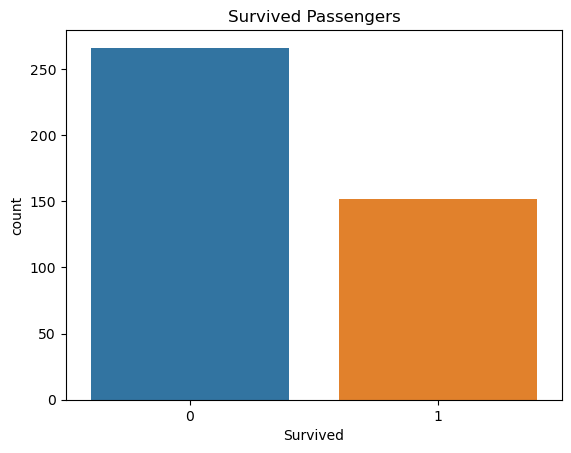

In [21]:
sns.countplot(x='Survived', data=df).set_title('Survived Passengers')
df['Survived'].value_counts()
plt.show()

### 2. Finding chances of survival based on Gender

In [33]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

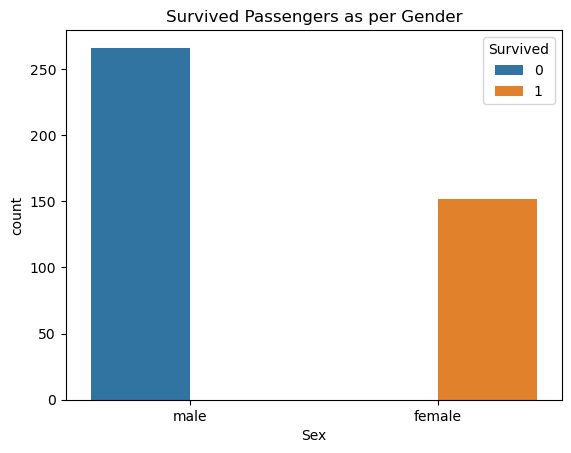

In [34]:
sns.countplot(x='Sex', hue='Survived', data=df).set_title('Survived Passengers as per Gender')
plt.show()

### 3. Finding chances of survival as per class

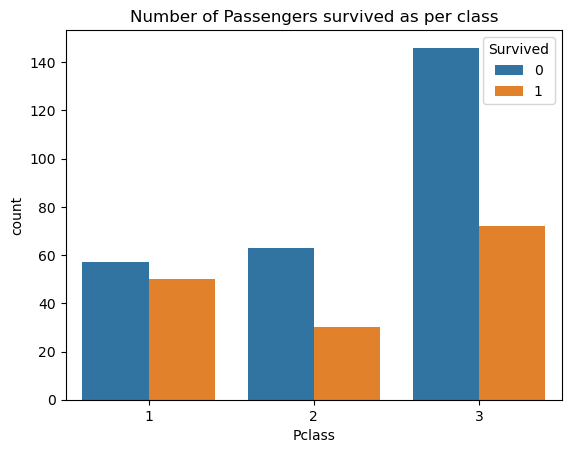

In [35]:
sns.countplot(x='Pclass', hue='Survived', data=df).set_title('Number of Passengers survived as per class')
plt.show()

### 4. Correlation for entire Dataset

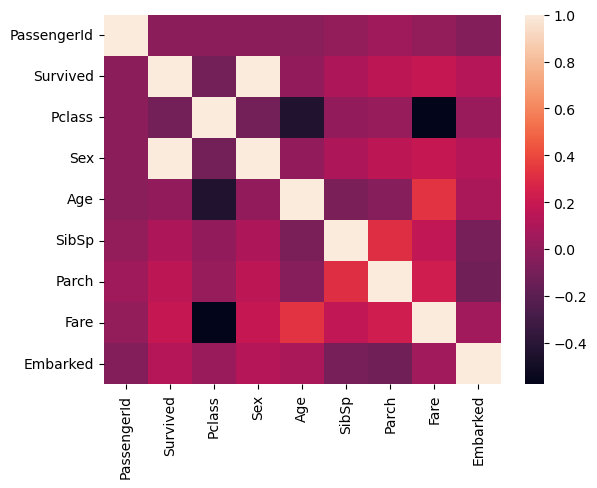

In [51]:
sns.heatmap(df.corr())
plt.show()

## Model Selection

In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Replacing Gender and Embarked categorical values with numeric values

In [37]:
df.replace({'Sex':{'male':1,'female':2}, 'Embarked':{'S':1,'C':2,'Q':3}}, inplace = True)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,3
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,3
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,1


### Splitting values into X and Y

In [39]:
X = df.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis = 1)
Y = df['Survived']
print(X)

     Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0         3    1  34.50000      0      0    7.8292         3
1         3    2  47.00000      1      0    7.0000         1
2         2    1  62.00000      0      0    9.6875         3
3         3    1  27.00000      0      0    8.6625         1
4         3    2  22.00000      1      1   12.2875         1
..      ...  ...       ...    ...    ...       ...       ...
413       3    1  30.27259      0      0    8.0500         1
414       1    2  39.00000      0      0  108.9000         2
415       3    1  38.50000      0      0    7.2500         1
416       3    1  30.27259      0      0    8.0500         1
417       3    1  30.27259      1      1   22.3583         2

[418 rows x 7 columns]


In [40]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 20)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [43]:
print(Y.shape, Y_train.shape, Y_test.shape)

(418,) (334,) (84,)


In [45]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

### Model Evaluation

In [46]:
model.score(X_test,Y_test)

1.0

In [47]:
model.score(X_train,Y_train)

1.0

In [49]:
Y_pred=model.predict(X_test)
print(Y_pred)

[1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1
 1 0 0 0 1 1 1 0 0 0]


## Survival Chances

In [50]:
X_test_prediction = model.predict(X_test)

# Calculating the survival rate
survival_rate = X_test_prediction.mean()

if survival_rate < 1:
    print("Congratulations! You survived.")
else:
    print("I'm sorry, but you have failed to survive.")

Congratulations! You survived.
